In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading and Saving Images

In [16]:
# Accessing and Modifying pixel values
# loads an image
image = cv2.imread('../img/beach.png') # OpenCV reads images in as B, G, R 
image = np.flip(image, axis = 2) # to Re-order channels as R, G, B for matplotlib renderer
# It returns a tuple of number of rows, columns and channels (if image is color)
image.shape

(475, 600, 3)

In [17]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

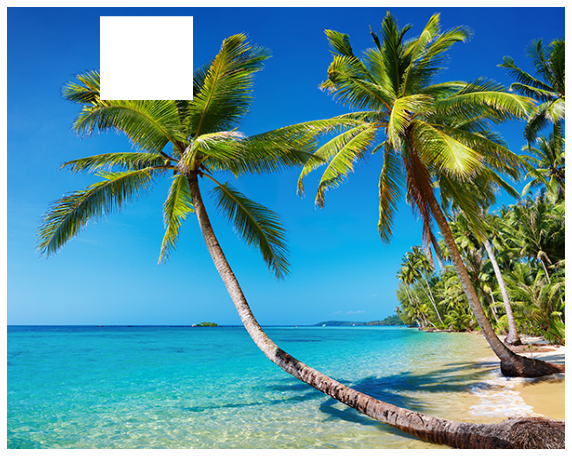

In [18]:
#image = np.flip(image, axis = 2)
image[10:100, 100:200] = [255, 255, 255]
show_image(image)

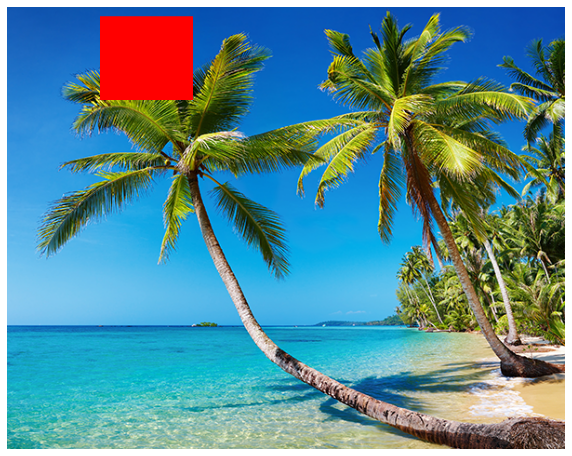

In [19]:
# accessing image section and converting it to white
image[10:100, 100:200] = [255, 0, 0]
show_image(image)

In [20]:
cv2.imwrite('edited.png', image) # Remember OpenCV operations expect images to be in the format # B, G, R

True

### EXERCISE: Load an image using CV2 and use `show_image()` function to show it

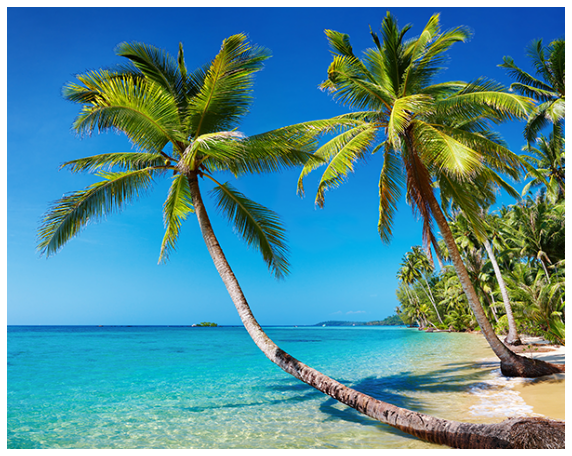

In [21]:
# TODO: What happens if we don't flip the image channels before showing it using matplotlib?
image = cv2.imread('../img/beach.png')
image = np.flip(image, axis = 2)
show_image(image, cmap = None, fig_size = (10, 10))

### EXERCISE: Load an image using CV2, draw a white rectangle on it then save it to disk using CV2

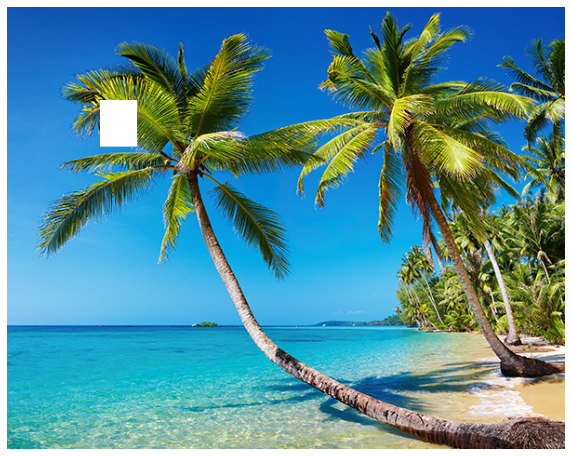

True

In [22]:

# TODO: Write your code below

# TODO: What happens if we don't flip the image channels before showing it using matplotlib?

image[100:150, 100:140] = [255, 255, 255]
show_image(image)
cv2.imwrite('../img/beach_square.png', image)

## 2. Colour Channels

### 2.1 Order of Colour Channels

In [26]:
shapes_image = "../img/beach.png"

In [27]:
# reads image using matplotlib
shapes_matpotlib = plt.imread(shapes_image) # R, G, B

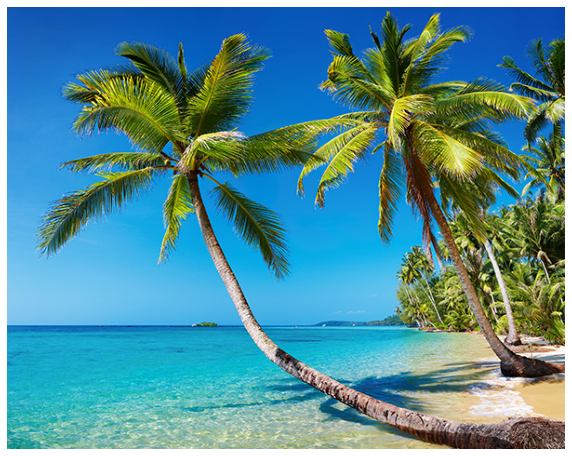

In [28]:
show_image(shapes_matpotlib)

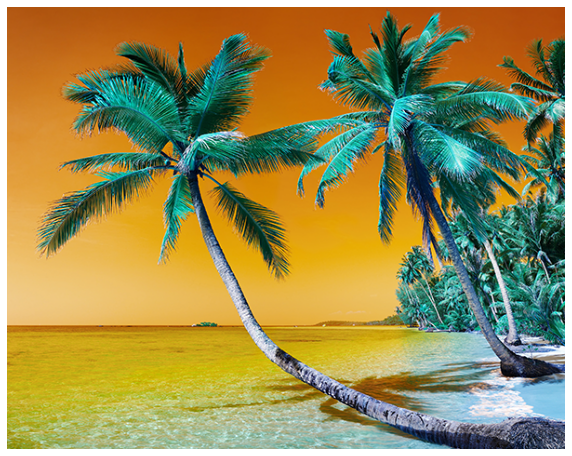

In [29]:
# The order of colour channels read in is important - Notice the colour changes
shapes_cv2 = cv2.imread(shapes_image)
show_image(shapes_cv2)

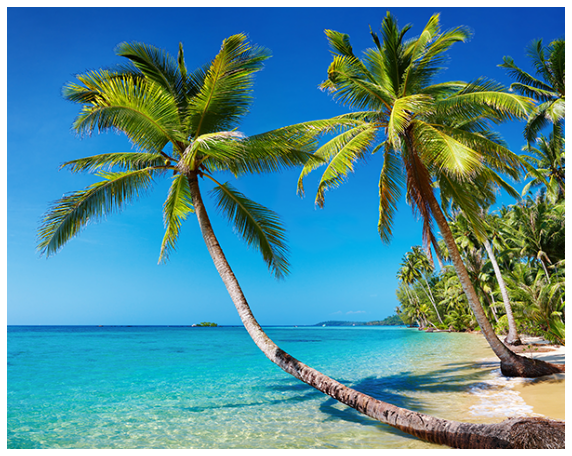

In [30]:
show_image(np.flip(shapes_cv2, axis = 2))

### 2.2 Flipping matrices with numpy

In [31]:
x = np.array([[[1,2, 3], [2, 3, 4], [3, 4, 5]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 6]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 7]]])
x

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]]])

In [32]:
x.shape

(3, 3, 3)

In [33]:
np.flip(x, axis =0 )

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]])

In [34]:
np.flip(x, axis =1 )

array([[[3, 4, 5],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 6],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 7],
        [2, 3, 4],
        [1, 2, 3]]])

In [35]:
np.flip(x, axis =2 )

array([[[3, 2, 1],
        [4, 3, 2],
        [5, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [6, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [7, 4, 3]]])

### 2.3 Splitting colour channels with matplotlib

In [38]:
cv2_channels = cv2.split(image)

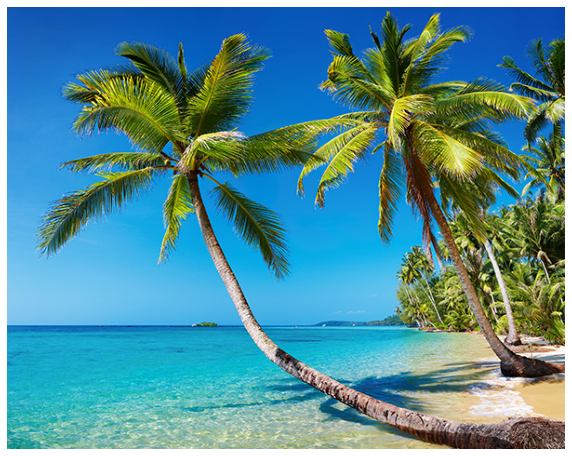

Red


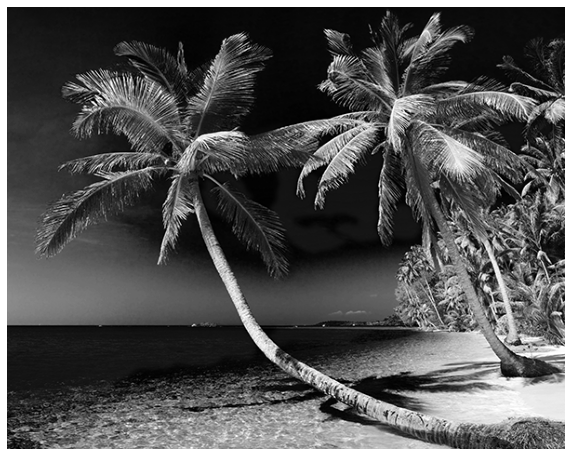

Green


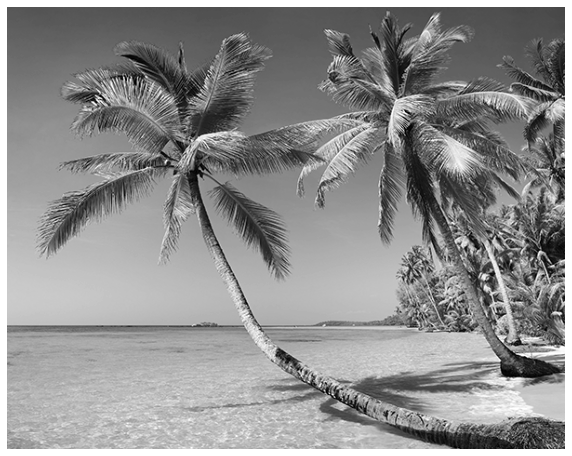

Blue


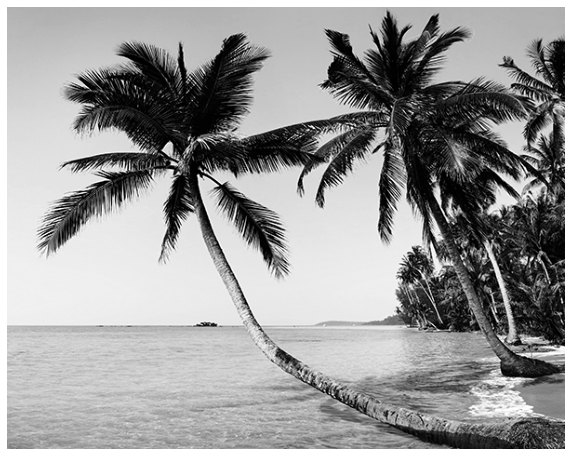

In [36]:
image = plt.imread('../img/beach.png')
show_image(image)
channels_matplotlib = [image[:, : , i] for i in range(3)]
names = ['Red', 'Green', 'Blue']
for name, channel in zip(names, channels_matplotlib):
    print(name)
    show_image(channel, cmap='gray')

### 2.4 Splitting colour channels with CV2

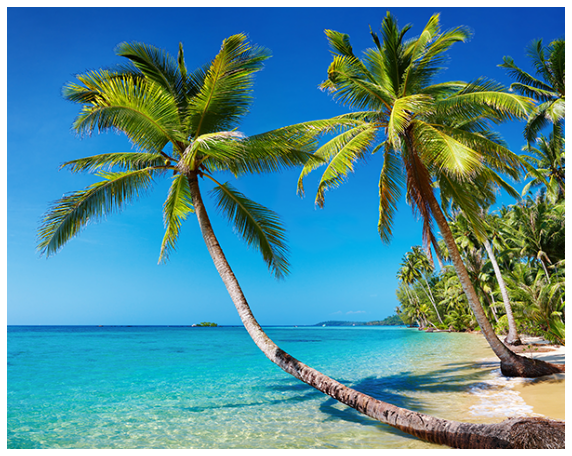

Red


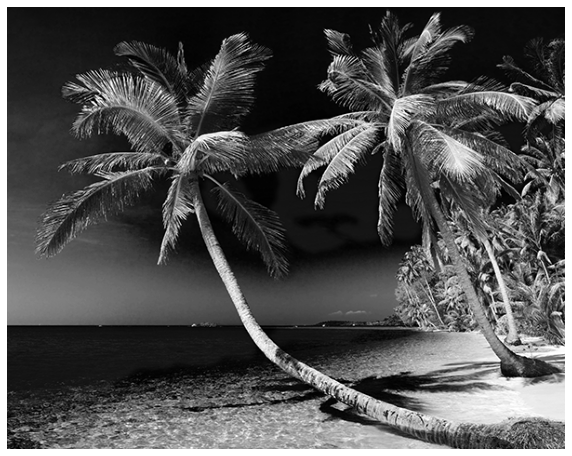

Green


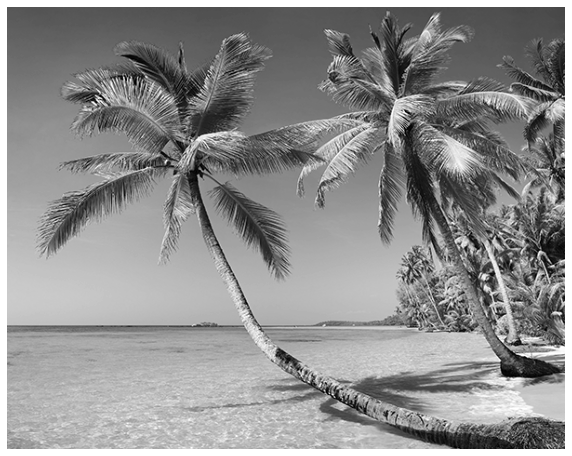

Blue


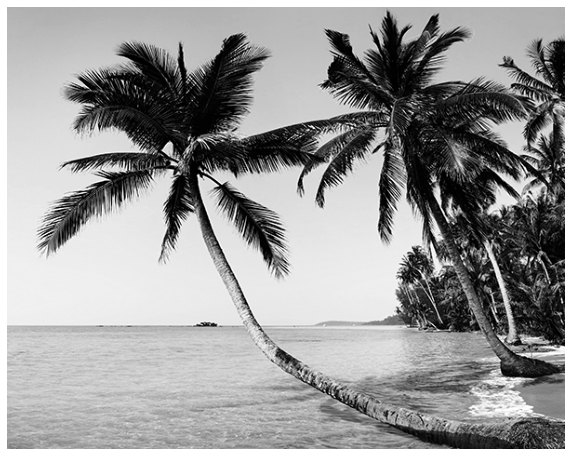

In [39]:
image = cv2.imread('../img/beach.png') # B, G, R -> this order is required for showing images with cv2.imshow().
image = np.flip(image, axis = 2) # R, G, B -> This order is required for showing images with plt.imshow().
show_image(image)
cv2_channels = cv2.split(image)
for name, channel in zip(names, cv2_channels):
    print(name)
    show_image(channel, cmap='gray')

### EXERCISE: Write a script that uses argument parser to load, crop and display an image with CV2 then saves it into a file

In [40]:
# Your code below

In [41]:
# %load ../solutions/parsing_commands.py
import argparse
import cv2

# Construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help = 'Path to the image')
ap.add_argument('-o', '--output', required=True, help = 'Path to saving the image')
args = vars(ap.parse_args())

image = cv2.imread(args['image'])
cv2.imshow('Original', image)

cv2.waitKey(0)

# crop the image by slicing the matrix
cropped = image[100: 1000, 10:300]
cv2.imshow('Edited', cropped)

cv2.waitKey(0)

# save the image to specified path
cv2.imwrite(f'{args["output"]}/cropped_coding.jpg', cropped)



usage: ipykernel_launcher.py [-h] -i IMAGE -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -o/--output


SystemExit: 2

C:\Users\attsa\.conda\envs\Computer Vision\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Homework 1: Write a function that reads in an image using either the matplotlib or CV2 and shows it in this notebook using matplotlib 

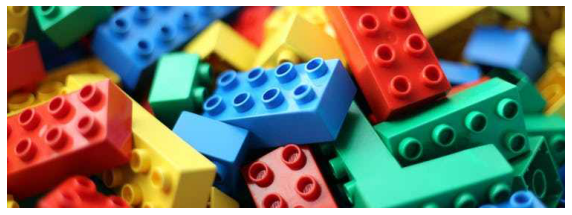

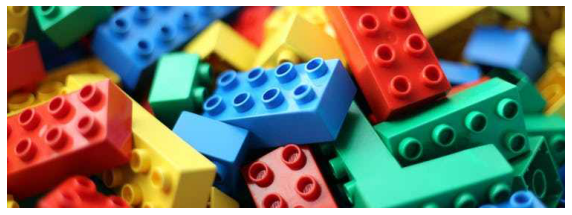

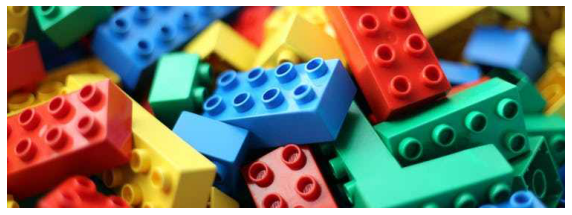

In [23]:
# TODO: Write your code below

image = cv2.imread('../img/lego.jpg') # B, G, R -> this order is required for showing images with cv2.imshow().
# convert the color.
from PIL import Image
image_matpotlib = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_matpotlib = Image.fromarray(image_matpotlib)
show_image(image_matpotlib)
image = cv2.imread('../img/lego.jpg') # B, G, R -> this order is required for showing images with cv2.imshow().
image = np.flip(image, axis = 2) # R, G, B -> This order is required for showing images with plt.imshow().
show_image(image)
image_matpotlib = plt.imread('../img/lego.jpg')
show_image(image_matpotlib)